<a href="https://colab.research.google.com/github/Nega0619/AI/blob/main/CV_GoindDeeper_03_Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

오늘은 이미지 data augmentation에 대해서 공부해보았습니다.

# 1. Data augmentation이란?

- 필요한 이유?

Data는 비용과 직결된다.

적은 양의 데이터를 최대한 불려서 많은 양의 데이터로 둔갑시키는 것. => 비용 절약의 효과가 있다.

또한, 다양한 노이즈의 추가로 test환경에서도 잘 돌아가도록 할 수 있다.

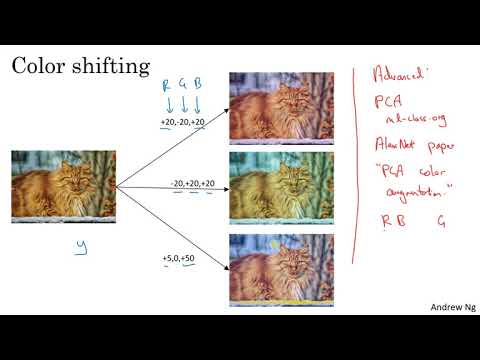

In [ ]:
from IPython.display import YouTubeVideo, display 
video = YouTubeVideo("JI8saFjK84o", width=500) 
display(video)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/GoingDeeper\ CV/data

/content/drive/MyDrive/GoingDeeper CV/data


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## 파일 가져오기

In [ ]:
import os
__file__ = '/content/drive/MyDrive/GoingDeeper CV/data/'
sample_img_path = os.path.abspath(os.path.join(os.path.dirname(__file__)))+'/mycat.jpg'
sample_img_path

'/content/drive/MyDrive/GoingDeeper CV/data/mycat.jpg'

In [ ]:
from PIL import Image
image = Image.open(sample_img_path).resize((500, 400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

# 2. Data augmentation 실습

## 2-1. Flip하기

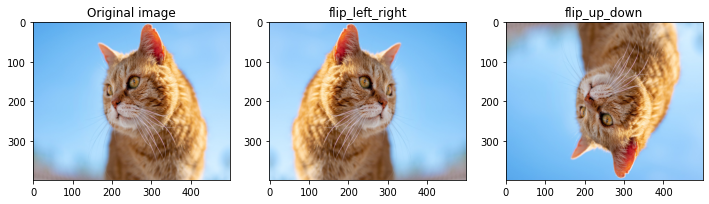

In [ ]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)

flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize = (12,12))

plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1, 3, 3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

# 랜덤 확률로 flip하기

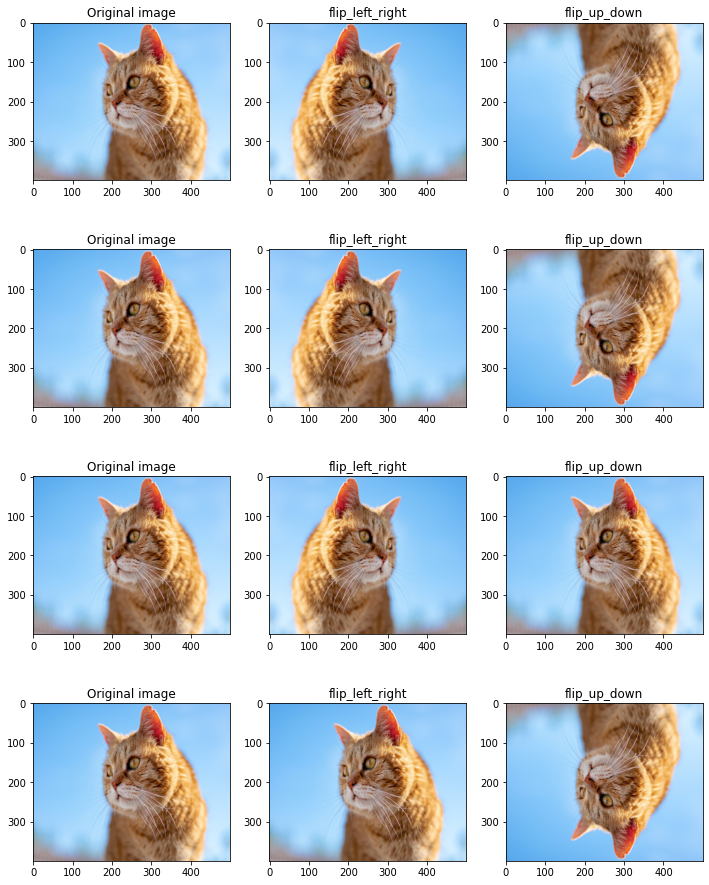

In [ ]:
plt.figure(figsize=(12,16))

row=4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

    plt.subplot(4, 3, i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4, 3, i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4, 3, i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## 2-2 Center crop

central_fraction : 얼마나 확대할 지 조절하는 매개변수

-> 1.0인 경우 원본 이미지

-> 객체가 잘려나가지 않도록 적절한 값을 설정해야함

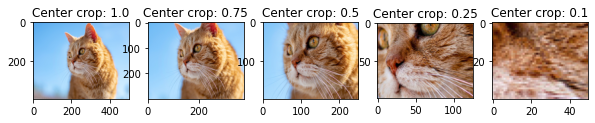

In [ ]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

### randomly center crop?
텐서플로우에서 center_crop의 random 버전 존재 X : 만들었음!

<br>

- tf. random.uniform

The generated values follow a uniform distribution in the range [minval, maxval)

\[minval, maxval\] 범위에서 균일한 분포(uniform distribution)의 벨류를 만들어 냅니다.
``` python
tf.random.uniform(
    shape,
    minval=0,
    maxval=None,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
```

- tf.random.normal

Outputs random values from a normal distribution.

```python
tf.random.normal(
    shape,
    mean=0.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
```

> tf.random.uniform : 균일 분포에서 무작위 데이터를 뽑고,

> tf.random.normal : 정규 분포에서 무작위 데이터를 뽑는다.

In [ ]:
def random_central_crop(image_tensor, range=(0, 1)):
    # range 범위에서 무작위로 잘라낼 비율을 선택합니다
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)

    # print('🔷🔷🔷 central_fraction : ', central_fraction)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    # print('🔷🔷🔷 cropped_tensor : ', cropped_tensor)
    return cropped_tensor

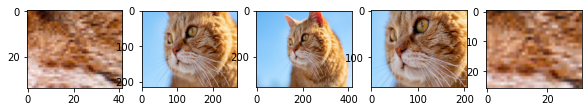

In [ ]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(col):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## 2-3 random_crop, random_brightness

### random_crop

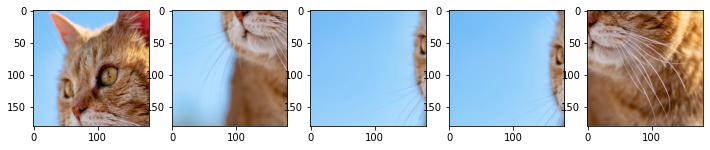

In [ ]:
# apply random_crop on cat image
plt.figure(figsize=(12, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

    plt.subplot(1, 5, i+1)
    plt.imshow(random_crop_image)
#    plt.show() 있으면 for 마다 이미지를 뿌려줘서 5, 1처럼 됨..


### random_brightness()

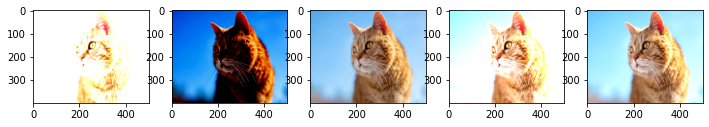

In [ ]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))

for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=200)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1, 5, i+1)
    plt.imshow(random_bright_image)

**6번 라인은 꼭 필요하다. max_delta값만 주면, 이미지는 아무것도 변하지 않는다..
6번 라인이 필요하다는 것을 document에서는 찾을 수 없었다.... 어거지로 찾아본 stackoverflow....**

https://stackoverflow.com/questions/48821218/tf-image-random-brightness-giving-negative-values-randomly-in-tensorflow

### 2-4. albumentations 라이브러리

https://github.com/albumentations-team/albumentations

augmentation에서는 배열을 이미지의 기본 형태로 사용합니다. 그래서 PIL Image데이터형을 numpy 배열로 변환하여 사용하도록 합니다.

In [ ]:
import numpy as np
image = Image.open(sample_img_path).resize((400, 300)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_arr = np.array(image)
image_arr.shape

(300, 400, 3)

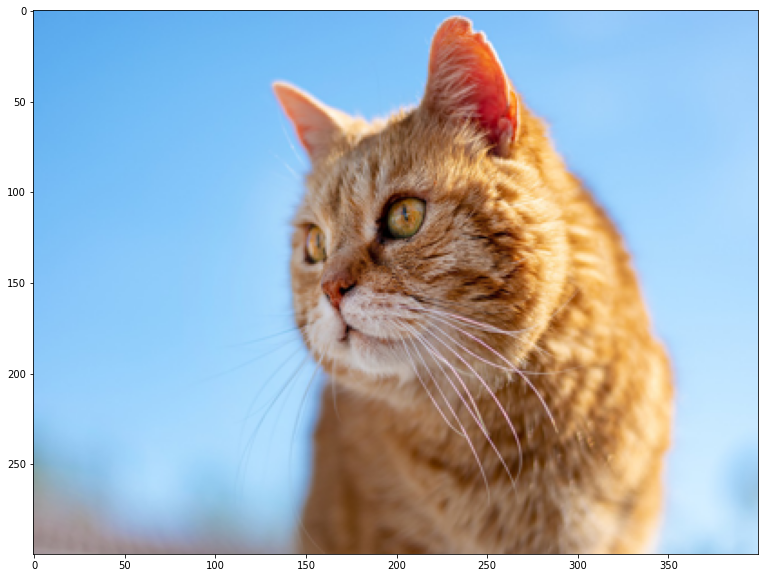

In [ ]:
def visualize(image):
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
visualize(image_arr)

### transformers.Affine()

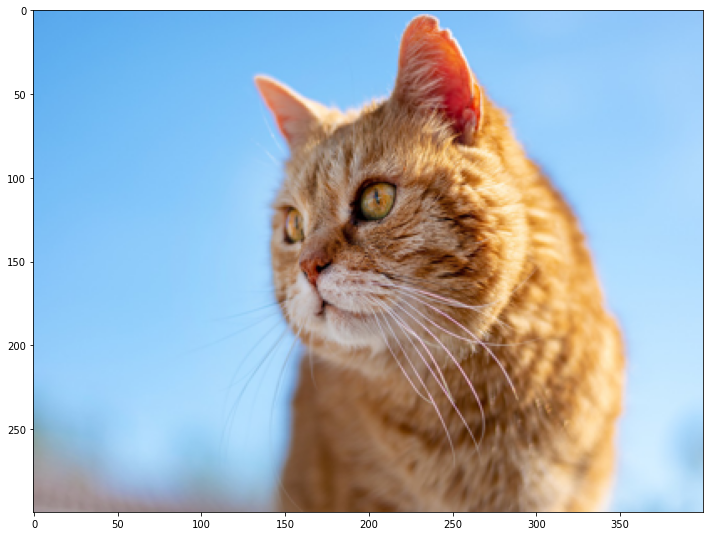

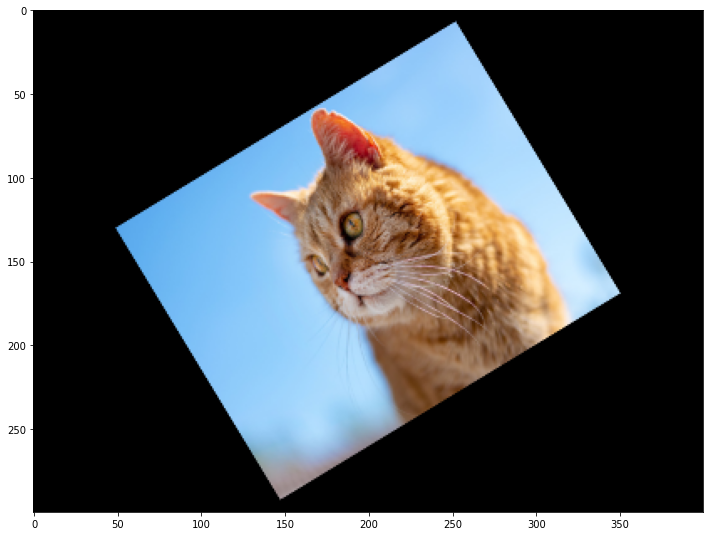

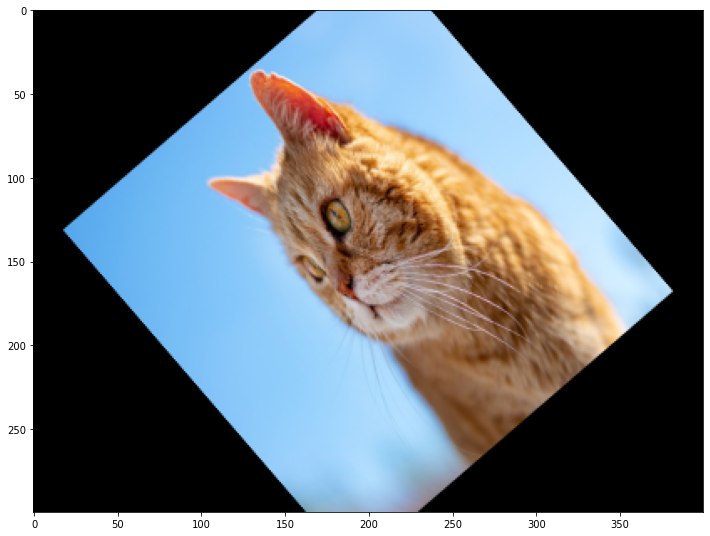

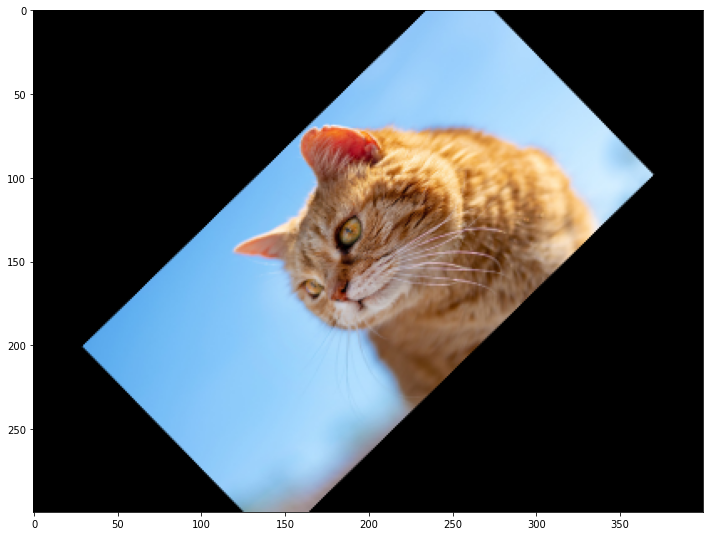

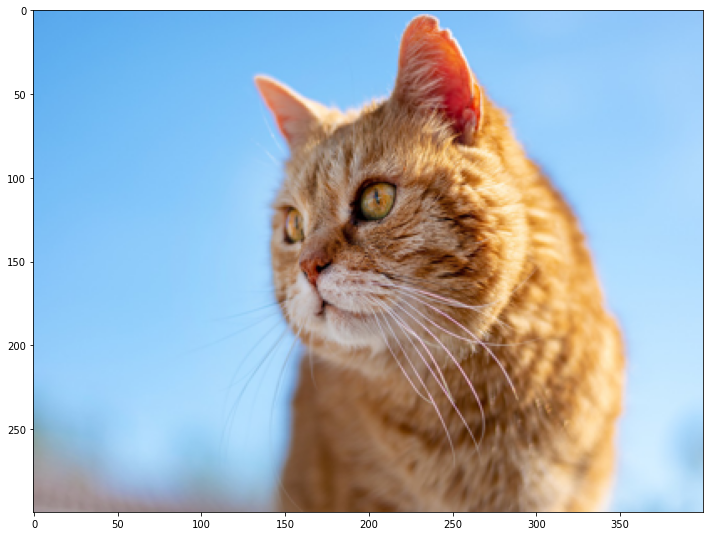

In [ ]:
import albumentations as A

for i in range(5):
    transform = A.Compose([
        A.Affine(rotate=(-45, 45),scale=(0.5,0.9),p=0.5) 
    ])
    transformed = transform(image=image_arr)
    plt.figure(figsize=(12,12))
    plt.imshow((transformed['image']))
    plt.show()

### transforms.RandomCrop()

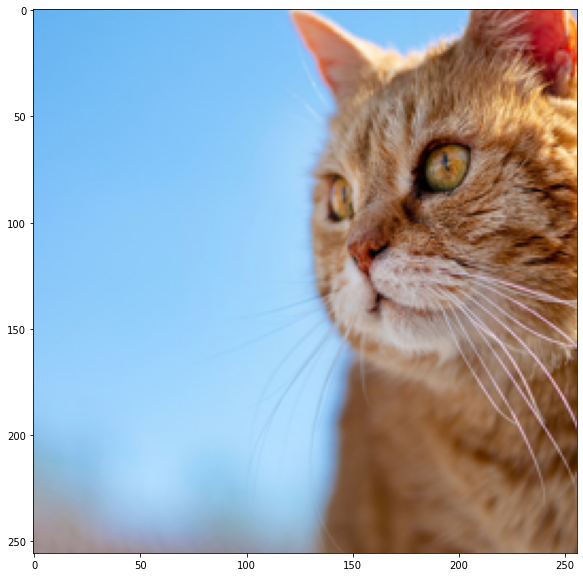

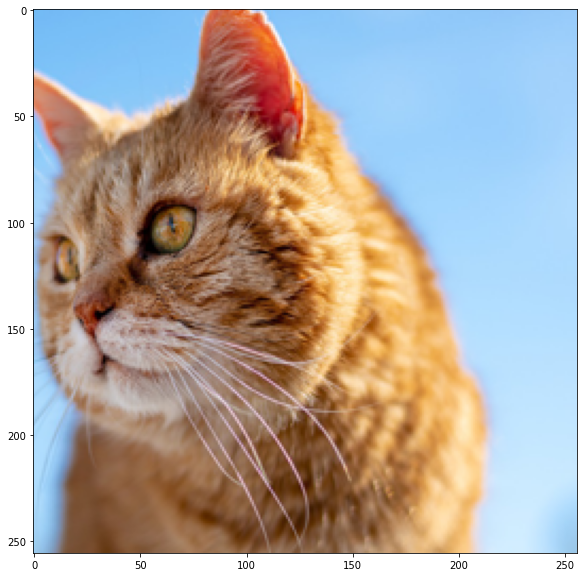

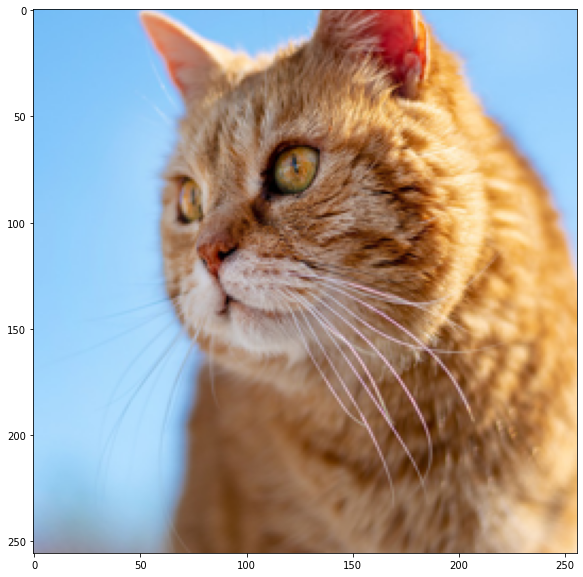

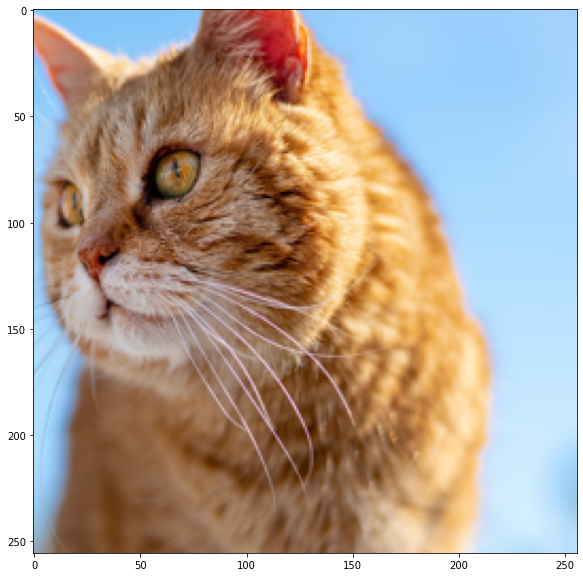

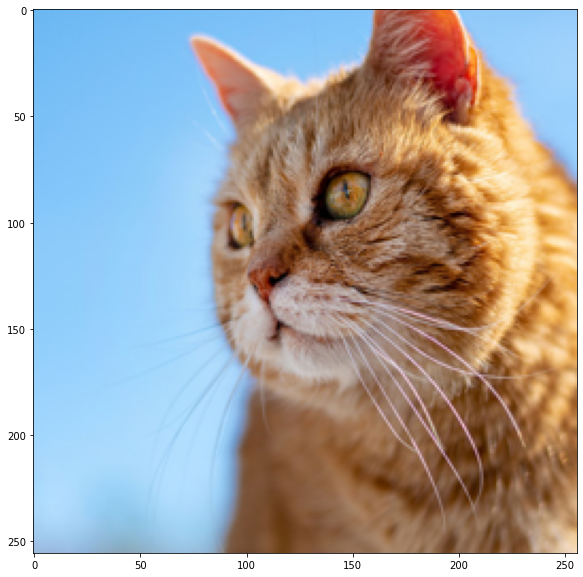

In [ ]:
import random
for i in range(5):
    transform = A.Compose(
        [A.RandomCrop(width=256, height=256)]
    )
    transformed = transform(image=image_arr)
    visualize(transformed['image'])

### MedianBlur()

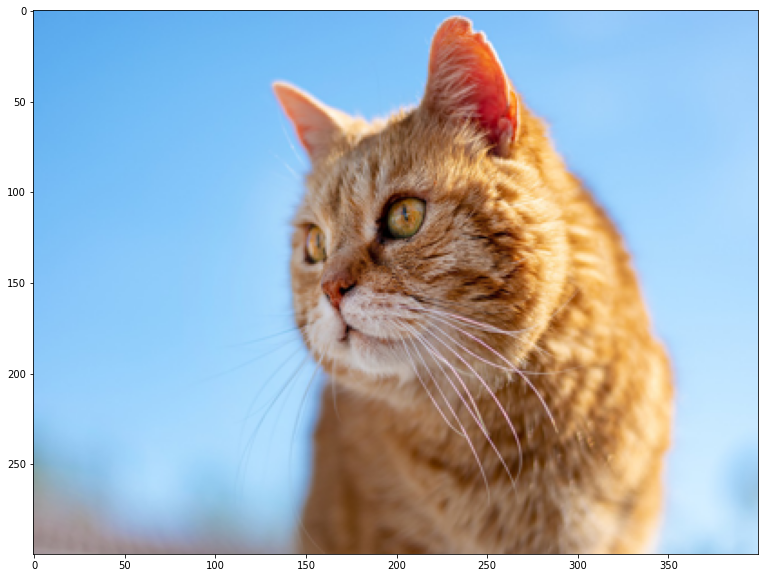

In [ ]:
transform = A.Compose(
    [A.MedianBlur(blur_limit=7, always_apply=False, p=0.5)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

### ToGray(), MultiplicativeNoise()

- MultiplicativeNoise()
augmentation기법들을 한 번에 조합하여 사용하는 방법

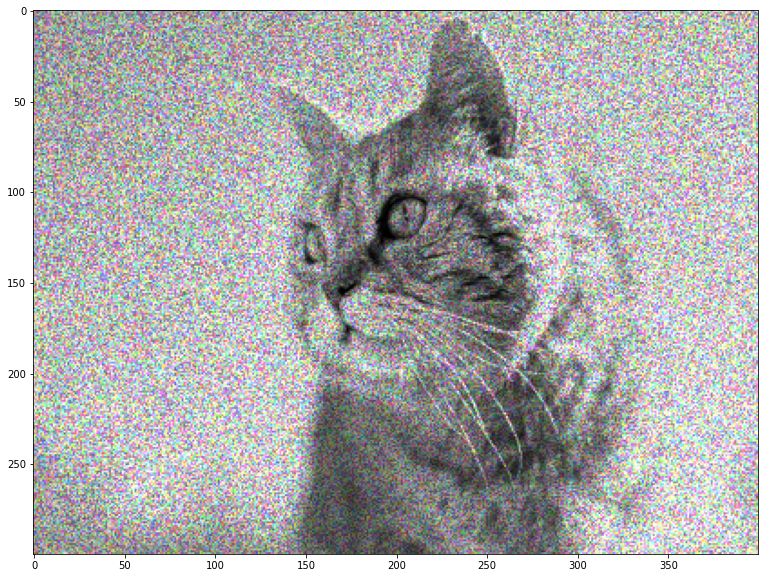

In [ ]:
transform = A.Compose(
    [A.ToGray(p=1),
    A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])